# **MODELADO**

In [39]:
#LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from pickle import dump
import os

In [ ]:
#DATA
sel_train= pd.read_csv ("/workspaces/Jese_David-Random_Forest-tutorial/Jese_David-Decision-Tree-project/data/Datasets/sel_dataset_train.csv")
sel_test = pd.read_csv ("/workspaces/Jese_David-Random_Forest-tutorial/Jese_David-Decision-Tree-project/data/Datasets/sel_dataset_test.csv")
target = "Outcome"

#Split
X_sel_train = sel_train.drop(columns=[target])
y_sel_train = sel_train[target]

X_sel_test = sel_test.drop(columns=[target])
y_sel_test = sel_test[target]

___

### **ARBOL**

In [41]:
tree_sel_base = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

tree_sel_base.fit(X_sel_train, y_sel_train)

y_sel_pred_base = tree_sel_base.predict(X_sel_test)

print("\n=== ÁRBOL BASE (SEL) ===")
print("Accuracy test:", accuracy_score(y_sel_test, y_sel_pred_base))
print("\nMatriz de confusión:\n", confusion_matrix(y_sel_test, y_sel_pred_base))
print("\nReporte de clasificación:\n", classification_report(y_sel_test, y_sel_pred_base))


=== ÁRBOL BASE (SEL) ===
Accuracy test: 0.6818181818181818

Matriz de confusión:
 [[75 25]
 [24 30]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       100
           1       0.55      0.56      0.55        54

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



### **GRAFICO**

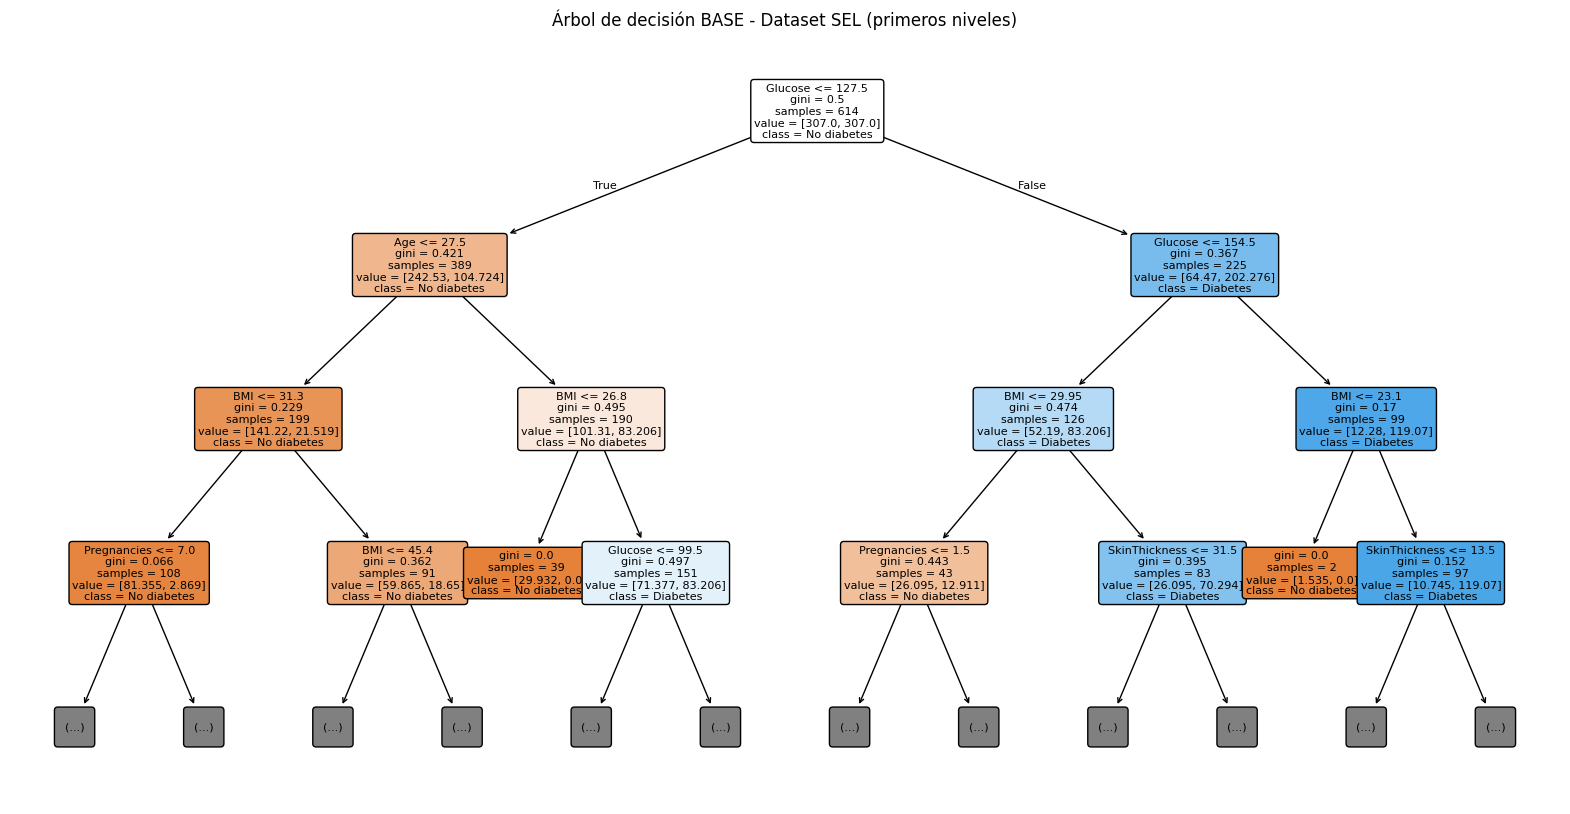

In [ ]:
plt.figure(figsize=(20, 10))

plot_tree(
    tree_sel_base,
    feature_names=X_sel_train.columns,
    class_names=["No diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    max_depth=3,       # solo para que el dibujo sea legible
    fontsize=8
)

plt.title("Árbol de decisión BASE - Dataset SEL (primeros niveles)")
plt.show()

#### **Guardo modelo**

In [43]:
os.makedirs("../models", exist_ok=True)

dump(
    tree_sel_base,
    open("../models/tree_sel_base.sav", "wb")
)

___

### **ARBOL OPTIMIZADO**

In [44]:
tree = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

param_grid = {
    "max_depth": [3, 4, 5, 6, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "criterion": ["gini", "entropy"]
}

grid_sel = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring="f1",   # clase 1 como positiva
    cv=5,
    n_jobs=-1
)

grid_sel.fit(X_sel_train, y_sel_train)

print("Mejores parámetros (SEL):", grid_sel.best_params_)
print("Mejor F1 (cv) SEL:", grid_sel.best_score_)


Mejores parámetros (SEL): {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}
Mejor F1 (cv) SEL: 0.6714774785776801


### **MODELO OPTIMIZADO**

In [45]:
best_tree_sel = grid_sel.best_estimator_

y_sel_pred_opt = best_tree_sel.predict(X_sel_test)

print("\n=== ÁRBOL OPTIMIZADO (SEL) ===")
print("Accuracy test:", accuracy_score(y_sel_test, y_sel_pred_opt))
print("\nMatriz de confusión:\n", confusion_matrix(y_sel_test, y_sel_pred_opt))
print("\nReporte de clasificación:\n", classification_report(y_sel_test, y_sel_pred_opt))



=== ÁRBOL OPTIMIZADO (SEL) ===
Accuracy test: 0.7467532467532467

Matriz de confusión:
 [[69 31]
 [ 8 46]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154



### **GRAFICO**

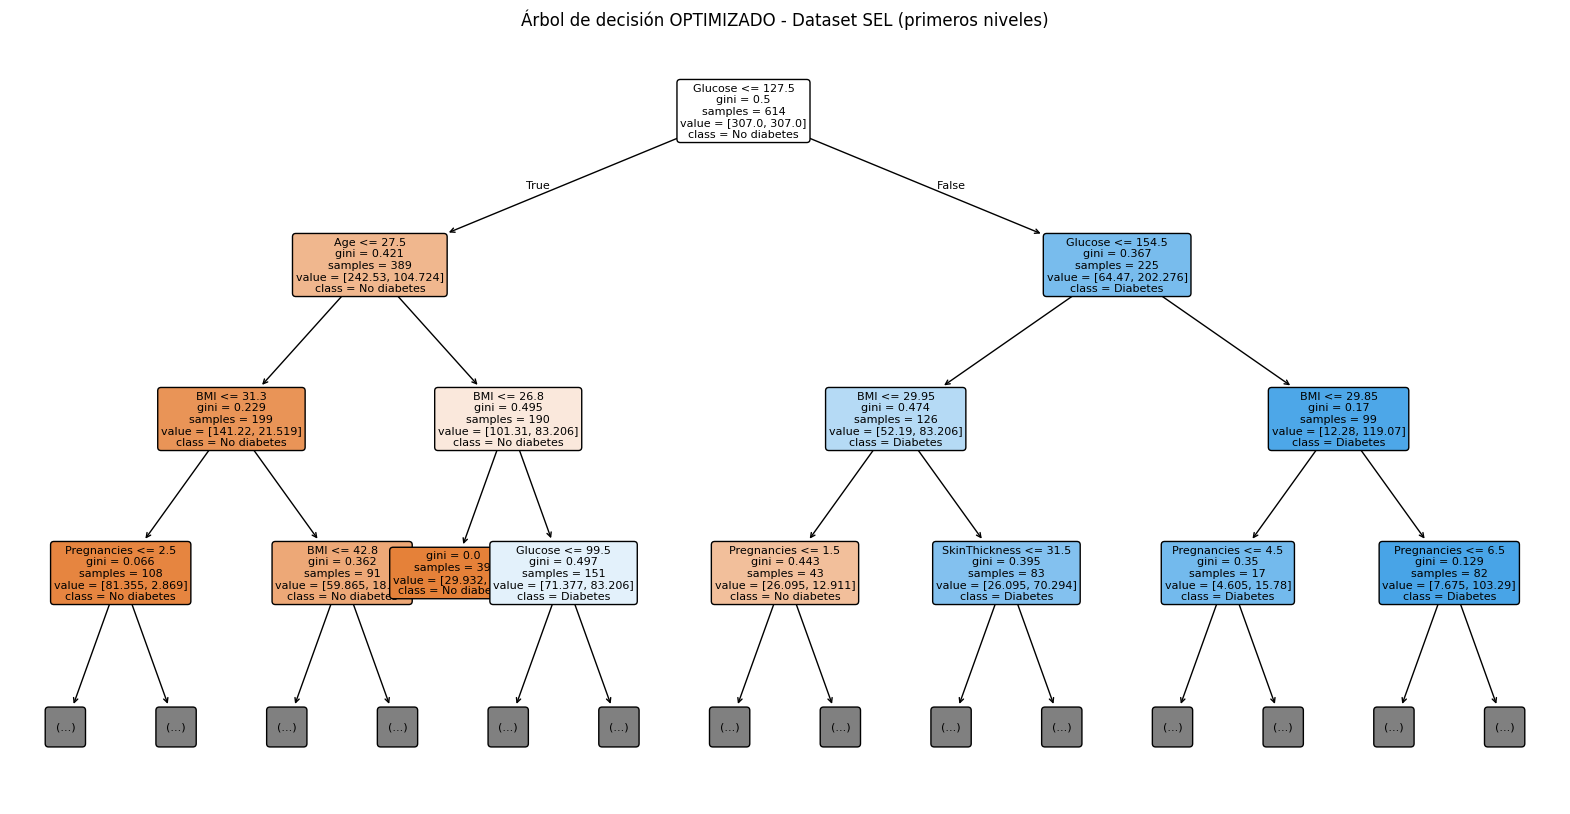

In [46]:
plt.figure(figsize=(20, 10))

plot_tree(
    best_tree_sel,
    feature_names=X_sel_train.columns,
    class_names=["No diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8
)

plt.title("Árbol de decisión OPTIMIZADO - Dataset SEL (primeros niveles)")
plt.show()


#### **Guardo Modelo**

In [47]:
dump(
    best_tree_sel,
    open("../models/tree_sel_optimized.sav", "wb")
)


___

### **VARIABLES IMPORTANTES**

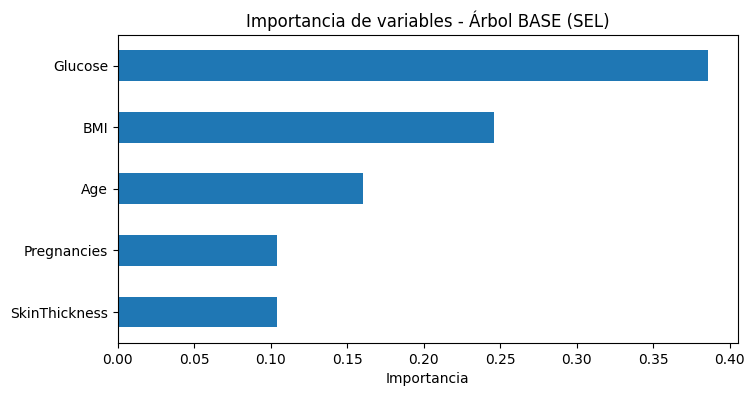

In [48]:
import pandas as pd

importancias = pd.Series(
    tree_sel_base.feature_importances_,
    index=X_sel_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
importancias.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Importancia de variables - Árbol BASE (SEL)")
plt.xlabel("Importancia")
plt.show()
